In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.integrate
import time

import jax
import jax.numpy as jnp
import jax.scipy as jsp
import diffrax
from jax.scipy import optimize

In [2]:
#load data
#load data from all-to-all connection
all2all_N_list = [94, 124, 174, 274, 374]

WL_all2all = []
biasL_all2all= []
costL_all2all = []
training_success_list_all2all = []
success_list_all2all = []

for k in all2all_N_list:
    WL_all2all.append(np.load('fig2_2all2all/WLulN{0}.npy'.format(k)))
    biasL_all2all.append(np.load('fig2_2all2all/biasLulN{0}.npy'.format(k)))
    costL_all2all.append(np.load('fig2_2all2all/costLulN{0}.npy'.format(k)))
    training_success_list_all2all.append(np.load('fig2_2all2all/training_success_listulN{0}.npy'.format(k)))
    success_list_all2all.append(np.load('fig2_2all2all/success_listulN{0}.npy'.format(k)))


#load data for layer architecture
layer_Nh_list = [20, 100, 200, 300]

WL_layer = []
biasL_layer = []
costL_layer = []
training_success_list_layer = []
success_list_layer = []

for k in layer_Nh_list:
    WL_layer.append(np.load('fig2layer/WLLh{0}.npy'.format(k), allow_pickle=True))
    biasL_layer.append(np.load('fig2layer/biasLh{0}.npy'.format(k)))
    costL_layer.append(np.load('fig2layer/costLh{0}.npy'.format(k)))
    training_success_list_layer.append(np.load('fig2layer/training_success_listh{0}.npy'.format(k)))
    success_list_layer.append(np.load('fig2layer/success_listh{0}.npy'.format(k)))
    
#load data for all-to-all with same #paras as layer architecture

sameparas_N_list = [85, 139, 185, 222]

WL_all2all_sp = []
biasL_all2all_sp= []
costL_all2all_sp = []
training_success_list_all2all_sp = []
success_list_all2all_sp = []

for k in sameparas_N_list:
    WL_all2all_sp.append(np.load('fig2all2all_same_paras/WLulN{0}.npy'.format(k)))
    biasL_all2all_sp.append(np.load('fig2all2all_same_paras/biasLulN{0}.npy'.format(k)))
    costL_all2all_sp.append(np.load('fig2all2all_same_paras/costLulN{0}.npy'.format(k)))
    training_success_list_all2all_sp.append(np.load('fig2all2all_same_paras/training_success_listulN{0}.npy'.format(k)))
    success_list_all2all_sp.append(np.load('fig2all2all_same_paras/success_listulN{0}.npy'.format(k)))

In [142]:
N_epoch = 2000
N_plot = 1000

test_W_ind = np.arange(0,N_epoch+1, 5)
plot_W_ind = np.arange(0,N_plot+1, 5)
N_W = len(plot_W_ind)

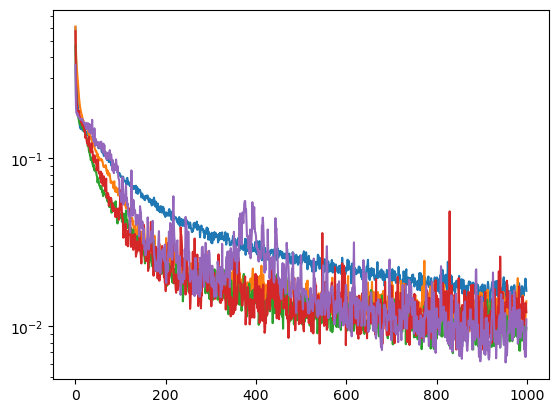

In [143]:
for k in range(0, len(all2all_N_list)):
    plt.plot(np.arange(0,N_plot), costL_all2all[k][0:N_plot], label="#h={0}".format(all2all_N_list[k]))
plt.yscale('log')

(0.05, 1)

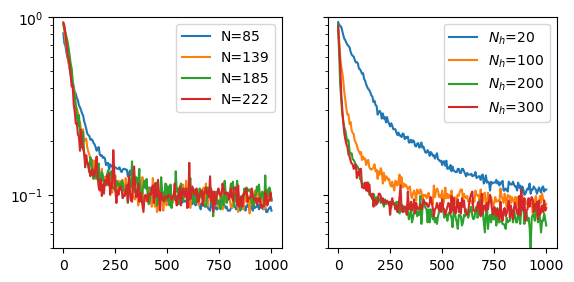

In [144]:
fig, ax = plt.subplots(1,2,sharey=True, figsize=(6.5,3))

for k in range(0,len(layer_Nh_list)):
    ax[1].plot(plot_W_ind, 1-success_list_layer[k][0:N_W], label=r"$N_h$={0}".format(layer_Nh_list[k]))
    ax[0].plot(plot_W_ind, 1-success_list_all2all_sp[k][0:N_W], label="N={0}".format(sameparas_N_list[k]))

ax[0].legend()
ax[1].legend()

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_ylim(0.05, 1)
ax[1].set_ylim(0.05, 1)

#fig.savefig('fig3_2.pdf', bbox_inches='tight', dpi=150)

In [145]:
for k in range(0, len(success_list_layer)):
    print(layer_Nh_list[k], jnp.max(training_success_list_layer[k]))

20 0.99714285
100 1.0
200 1.0
300 0.99857146


In [146]:
for k in range(0, len(success_list_layer)):
    print(layer_Nh_list[k], jnp.max(success_list_layer[k]))

20 0.91714287
100 0.93
200 0.95
300 0.93857145


In [147]:
for k in range(0, len(success_list_layer)):
    print(layer_Nh_list[k], jnp.max(success_list_all2all_sp[k]))

20 0.93285716
100 0.92714286
200 0.9242857
300 0.9285714


In [148]:
digits = [0,1,2,3,4,5,6,7,8,9]

phase1L_all2all = []
phase0L_all2all = []

for k in range(0, len(all2all_N_list)):
    phase0L_all2all.append(np.load("fig2_2all2all/test_phase0ulN{0}.npy".format(all2all_N_list[k])))
    phase1L_all2all.append(np.load("fig2_2all2all/test_phase1ulN{0}.npy".format(all2all_N_list[k])))
    
    
phase1L_layer = []
phase0L_layer = []

for k in range(0, len(layer_Nh_list)):
    phase0L_layer.append(np.load("fig2layer/test_phase0h{0}.npy".format(layer_Nh_list[k])))
    phase1L_layer.append(np.load("fig2layer/test_phase1h{0}.npy".format(layer_Nh_list[k])))
    
    
phase1L_sp = []
phase0L_sp = []

for k in range(0, len(sameparas_N_list)):
    phase0L_sp.append(np.load("fig2all2all_same_paras/test_phase0ulN{0}.npy".format(sameparas_N_list[k])))
    phase1L_sp.append(np.load("fig2all2all_same_paras/test_phase1ulN{0}.npy".format(sameparas_N_list[k])))

In [149]:
def h_entropy(x):
    if x==0: 
        return 0
    else:
        return -x*np.log2(x)
        
vfun = np.vectorize(h_entropy)

def calculate_cond_entropy(phaseL_0, phaseL_1, digits, output_index):
    
    # Calculate conditional entropy for output phase
    prob_mat_list = 1 + np.sin(phaseL_1[...,output_index])
    N_slice, N_data = prob_mat_list.shape[0], prob_mat_list.shape[1]
    prob_mat_list = prob_mat_list.reshape(N_slice, len(digits), int(N_data/len(digits)), len(digits))
    
    reg_prob = np.zeros(prob_mat_list.shape)
    for k in range(0,len(digits)):
        reg_prob[...,k] = prob_mat_list[...,k]/np.sum(prob_mat_list, axis=3)
    
    reg_prob = np.mean(reg_prob, axis=2)
    H_mat = np.sum(vfun(reg_prob*np.eye(len(digits), len(digits))), axis=2)
    H_mean = np.mean(H_mat, axis=1)
    
    # Calculate conditional entropy for inference result
    res = np.transpose(np.argmax(prob_mat_list,axis=-1), [0,2,1])
    output = np.tensordot(np.ones(res.shape[0:-1]), np.arange(0,len(digits)),0) == res
    
    output_mat = np.zeros([N_slice,len(digits),len(digits)])

    for k in range(0,len(digits)):
        output_mat[:,:,k] = np.sum(res==k*np.ones(res.shape), axis=1)/(N_data/len(digits))
    
    Inf_H_mat = vfun(np.sum(output_mat*np.eye(len(digits),len(digits)), axis=2))
    Inf_H_mean = np.mean(Inf_H_mat, axis=1)
    
    return H_mat, H_mean, Inf_H_mat, Inf_H_mean, output_mat

In [150]:
# check the result for the testing sets

layer_Nh_list = [20, 100, 200, 300]

k = 3

phase1_layer = phase1L_layer[k]

Nh = layer_Nh_list[k]
N = Nh + 64 + 10
output_index = jnp.arange(Nh+64, N)

output_phase = phase1_layer[:,:,output_index]
output = jnp.argmax(jnp.sin(output_phase), axis=2)
output = output.reshape(401, 10, 70)

standard_res = jnp.tensordot(jnp.arange(0,10), jnp.ones(70), 0)

is_correct = standard_res == output
p_correct = jnp.sum(is_correct, axis=(1,2))/700

print(jnp.max(p_correct))

0.93714285


In [151]:
# check the result for the testing sets

N = sameparas_N_list[k]
output_index = jnp.arange(N-10, N)

phase1_all2all_sp = phase1L_sp[k]
    
output_phase = phase1_all2all_sp[:,:,output_index]
output = jnp.argmax(jnp.sin(output_phase), axis=2)
output = output.reshape(401, 10, 70)
is_correct = standard_res == output
p_correct = jnp.sum(is_correct, axis=(1,2))/700

print(jnp.max(p_correct))

0.9285714


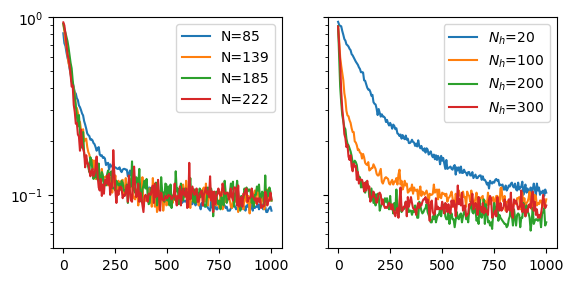

In [154]:
fig, ax = plt.subplots(1,2,sharey=True, figsize=(6.5,3))

standard_res = jnp.tensordot(jnp.arange(0,10), jnp.ones(70), 0)

for k in range(0,len(layer_Nh_list)):
    
    Nh = layer_Nh_list[k]
    N = Nh + 64 + 10
    output_index = jnp.arange(Nh+64, N)
    
    phase1_layer = phase1L_layer[k]
    phase1_all2all_sp = phase1L_sp[k]
    
    output_phase = phase1_layer[:,:,output_index]
    output = jnp.argmax(jnp.sin(output_phase), axis=2)
    output = output.reshape(401, 10, 70)
    is_correct = standard_res == output
    sl_layer = jnp.sum(is_correct, axis=(1,2))/700
    
    N = sameparas_N_list[k]
    output_index = jnp.arange(N-10, N)
    
    phase1_layer = phase1L_layer[k]
    phase1_all2all_sp = phase1L_sp[k]
    
    output_phase = phase1_all2all_sp[:,:,output_index]
    output = jnp.argmax(jnp.sin(output_phase), axis=2)
    output = output.reshape(401, 10, 70)
    is_correct = standard_res == output
    sl_sp = jnp.sum(is_correct, axis=(1,2))/700
    
    
    ax[1].plot(plot_W_ind, 1-sl_layer[0:N_W], label=r"$N_h$={0}".format(layer_Nh_list[k]))
    ax[0].plot(plot_W_ind, 1-sl_sp[0:N_W], label="N={0}".format(sameparas_N_list[k]))

ax[0].legend()
ax[1].legend()

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_ylim(0.05, 1)
ax[1].set_ylim(0.05, 1)

fig.savefig('fig3_2.pdf', bbox_inches='tight', dpi=150)

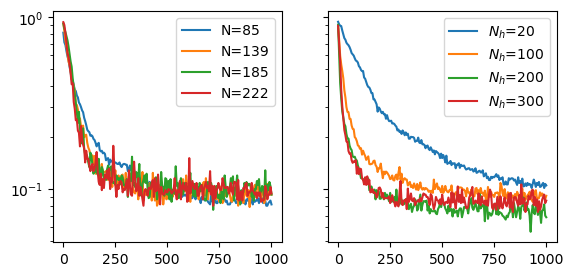

In [153]:
fig, ax = plt.subplots(1,2,sharey=True, figsize=(6.5,3))

standard_res = jnp.tensordot(jnp.arange(0,10), jnp.ones(70), 0)

for k in range(0,len(layer_Nh_list)):
    
    Nh = layer_Nh_list[k]
    N = Nh + 64 + 10
    output_index = jnp.arange(Nh+64, N)
    
    phase1_layer = phase1L_layer[k]
    phase1_all2all_sp = phase1L_sp[k]
    
    output_phase = phase1_layer[:,:,output_index]
    output = jnp.argmax(jnp.sin(output_phase), axis=2)
    output = output.reshape(401, 10, 70)
    is_correct = standard_res == output
    sl_layer = jnp.sum(is_correct, axis=(1,2))/700
    
    N = sameparas_N_list[k]
    output_index = jnp.arange(N-10, N)
    
    phase1_layer = phase1L_layer[k]
    phase1_all2all_sp = phase1L_sp[k]
    
    output_phase = phase1_all2all_sp[:,:,output_index]
    output = jnp.argmax(jnp.sin(output_phase), axis=2)
    output = output.reshape(401, 10, 70)
    is_correct = standard_res == output
    sl_sp = jnp.sum(is_correct, axis=(1,2))/700
    
    
    ax[1].plot(plot_W_ind, 1-(sl_layer[0:N_W] + success_list_layer[k][0:N_W])/2, label=r"$N_h$={0}".format(layer_Nh_list[k]))
    ax[0].plot(plot_W_ind, 1-(sl_sp[0:N_W] + success_list_all2all_sp[k][0:N_W])/2, label="N={0}".format(sameparas_N_list[k]))

ax[0].legend()
ax[1].legend()

ax[0].set_yscale('log')
ax[1].set_yscale('log')

In [12]:
# Calculate the entropy of confusion matrix

def get_confusion_mat(phase_1, output_index, test_batch_size):
    # get the confusion matrix for single sets of output
    phase_out = phase_1[:, output_index]
    results = jnp.argmax(1+jnp.sin(phase_out), axis=1).reshape(10, test_batch_size)
    
    confusion_mat = jnp.zeros([10,10])
    # terms in confusion_mat[i,j] refers the probability of taking input i as j
    for k in range(0,10):
        confusion_mat = confusion_mat.at[:,k].set(jnp.sum(results==k, axis=1))
    return confusion_mat/test_batch_size

def get_entropy(confusion_mat):
    H_terms = -confusion_mat * jnp.log2(confusion_mat+1e-15)
    return jnp.sum(H_terms, axis=1)

In [13]:
k = -2
#conf_mat_all2all = jax.vmap(get_confusion_mat, (0,None,None))(phase1L_all2all[k], np.arange(all2all_N_list[k]-10,all2all_N_list[k]), 70)
conf_mat_layer = jax.vmap(get_confusion_mat, (0,None,None))(phase1L_layer[k], np.arange(layer_Nh_list[k]+74-10,layer_Nh_list[k]+74), 70)
conf_mat_sp = jax.vmap(get_confusion_mat, (0,None,None))(phase1L_sp[k], np.arange(sameparas_N_list[k]-10,sameparas_N_list[k]), 70)

In [14]:
phase1L_layer[-2].shape

(401, 700, 274)

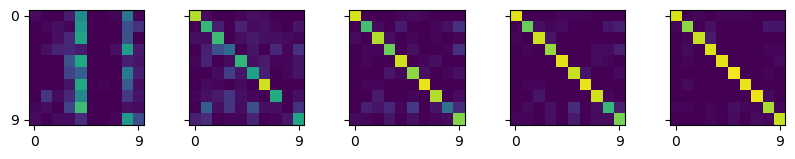

In [15]:
## layer structure 0, 10, 100, 1000
slice_number_L = [0, 2, 10, 20, 200]
ticks = [0,9]
fig, ax = plt.subplots(1,len(slice_number_L),figsize=(10,1.5), sharey=True)

for k in range(0,len(slice_number_L)):
    ax[k].imshow(conf_mat_layer[slice_number_L[k],...], vmin=0, vmax=1)
    ax[k].set_xticks(ticks)

ax[0].set_yticks(ticks)
#fig.tight_layout()
fig.savefig('fig3_2_2.pdf', bbox_inches='tight', dpi=150)

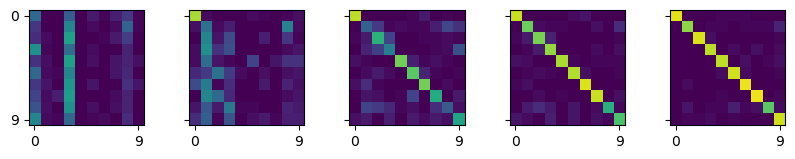

In [16]:
#all-to-all, same number of parameter as layer structure
fig, ax = plt.subplots(1,len(slice_number_L),figsize=(10,1.5),sharey=True)

for k in range(0,len(slice_number_L)):
    ax[k].imshow(conf_mat_sp[slice_number_L[k],...], vmin=0, vmax=1)
    ax[k].set_xticks(ticks)

ax[0].set_yticks(ticks)
fig.savefig('fig3_2_3.pdf', bbox_inches='tight', dpi=150)

In [17]:
conf_mat_layer.shape

(401, 10, 10)

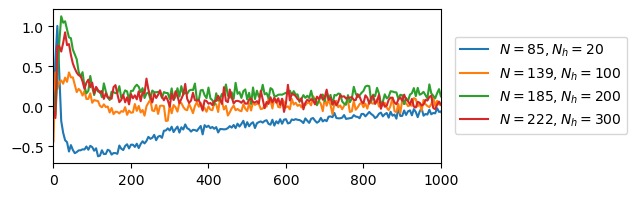

In [18]:
fig, ax = plt.subplots(1,1,figsize=(5,2))

for k in range(0, len(layer_Nh_list)):
    conf_mat_layer = jax.vmap(get_confusion_mat, (0,None,None))(phase1L_layer[k], np.arange(layer_Nh_list[k]+74-10,layer_Nh_list[k]+74), 70)
    conf_mat_sp = jax.vmap(get_confusion_mat, (0,None,None))(phase1L_sp[k], np.arange(sameparas_N_list[k]-10,sameparas_N_list[k]), 70)
    H_layer = jax.vmap(get_entropy)(conf_mat_layer)
    H_sp = jax.vmap(get_entropy)(conf_mat_sp)
    ax.plot(test_W_ind, jnp.mean(H_sp-H_layer, axis=1),label=r'$N={0}, N_h={1}$'.format(sameparas_N_list[k], layer_Nh_list[k]))

ax.set_xlim(0,1000)
fig.legend(fontsize=10, loc='center', bbox_to_anchor=(1.1, 0.5))
fig.savefig('fig3_3.pdf', bbox_inches='tight', dpi=150)

In [19]:
H_layer = jax.vmap(get_entropy)(conf_mat_layer)
H_sp = jax.vmap(get_entropy)(conf_mat_sp)

In [20]:
H_sp-H_layer

Array([[ 0.20713878, -0.37916684, -0.9687935 , ...,  0.37607002,
         0.07358742, -0.13880944],
       [-0.48369038, -0.0223484 , -0.10175705, ...,  0.55841196,
        -0.64709187,  0.10999846],
       [ 0.09876871,  0.631135  ,  0.15421951, ...,  1.1384629 ,
         0.65978265,  0.89843667],
       ...,
       [ 0.34801972,  0.06476116,  0.36969358, ...,  0.10772453,
        -1.1922846 , -0.08869708],
       [ 0.37067816, -0.06441188,  0.2335653 , ...,  0.18596372,
        -0.0957731 , -0.46647146],
       [ 0.29368824,  0.2778995 ,  0.43375793, ...,  0.02857143,
        -0.32346272,  0.3382705 ]], dtype=float32)

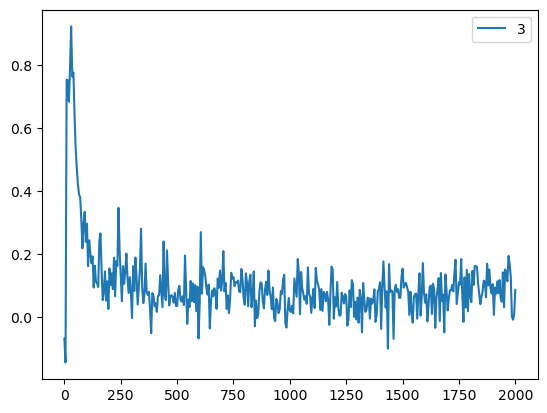

In [21]:
plt.plot(test_W_ind, jnp.mean(H_sp-H_layer, axis=1),label='{0}'.format(k))
plt.legend()

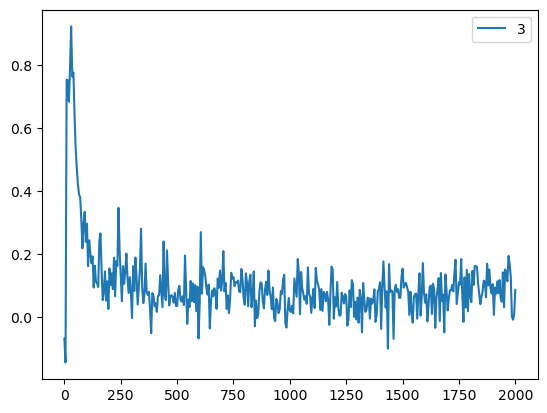

In [22]:
plt.plot(test_W_ind, jnp.mean(H_sp-H_layer, axis=1),label='{0}'.format(k))
plt.legend()

In [23]:
for k in range(0, 10):
    plt.plot(test_W_ind, 1-conf_mat_all2all[:,k,k],label='{0}'.format(k))
    
plt.yscale('log')
plt.legend()

NameError: name 'conf_mat_all2all' is not defined

In [ ]:
for k in range(0, 10):
    plt.plot(test_W_ind, 1-conf_mat_layer[:,k,k],label='{0}'.format(k))
    
plt.yscale('log')
plt.legend()

In [ ]:
for k in range(0, 10):
    plt.plot(test_W_ind, 1-conf_mat_sp[:,k,k],label='{0}'.format(k))
    
plt.yscale('log')
plt.legend()